In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style
from scipy.stats import skewnorm

In [3]:
users_history_data = pd.read_csv("./spotifiy_data_set/User Listening History.csv")
music_data = pd.read_csv("./spotifiy_data_set/Music Info.csv")

In [4]:
print(music_data.shape)
print(music_data.info())

(50683, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50683 entries, 0 to 50682
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   track_id             50683 non-null  object 
 1   name                 50683 non-null  object 
 2   artist               50683 non-null  object 
 3   spotify_preview_url  50683 non-null  object 
 4   spotify_id           50683 non-null  object 
 5   tags                 49556 non-null  object 
 6   genre                22348 non-null  object 
 7   year                 50683 non-null  int64  
 8   duration_ms          50683 non-null  int64  
 9   danceability         50683 non-null  float64
 10  energy               50683 non-null  float64
 11  key                  50683 non-null  int64  
 12  loudness             50683 non-null  float64
 13  mode                 50683 non-null  int64  
 14  speechiness          50683 non-null  float64
 15  acousticness         506

In [5]:
print(users_history_data.shape)
print(users_history_data.info())

(9711301, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9711301 entries, 0 to 9711300
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   track_id   object
 1   user_id    object
 2   playcount  int64 
dtypes: int64(1), object(2)
memory usage: 222.3+ MB
None


In [6]:
music_data.head()

,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,TRIOREW128F424EAF0,Mr. Brightside,The Killers,https://p.scdn.co/mp3-preview/4d26180e6961fd46...,09ZQ5TmUG8TSL56n0knqrj,"rock, alternative, indie, alternative_rock, in...",NaN,2004,222200,0.355,...,1,-4.360,1,0.0746,0.001190,0.000000,0.0971,0.240,148.114,4
1,TRRIVDJ128F429B0E8,Wonderwall,Oasis,https://p.scdn.co/mp3-preview/d012e536916c927b...,06UfBBDISthj1ZJAtX4xjj,"rock, alternative, indie, pop, alternative_roc...",NaN,2006,258613,0.409,...,2,-4.373,1,0.0336,0.000807,0.000000,0.2070,0.651,174.426,4
2,TROUVHL128F426C441,Come as You Are,Nirvana,https://p.scdn.co/mp3-preview/a1c11bb1cb231031...,0keNu0t0tqsWtExGM3nT1D,"rock, alternative, alternative_rock, 90s, grunge",RnB,1991,218920,0.508,...,4,-5.783,0,0.0400,0.000175,0.000459,0.0878,0.543,120.012,4
3,TRUEIND128F93038C4,Take Me Out,Franz Ferdinand,https://p.scdn.co/mp3-preview/399c401370438be4...,0ancVQ9wEcHVd0RrGICTE4,"rock, alternative, indie, alternative_rock, in...",NaN,2004,237026,0.279,...,9,-8.851,1,0.0371,0.000389,0.000655,0.1330,0.490,104.560,4
4,TRLNZBD128F935E4D8,Creep,Radiohead,https://p.scdn.co/mp3-preview/e7eb60e9466bc3a2...,01QoK9DA7VTeTSE3MNzp4I,"rock, alternative, indie, alternative_rock, in...",RnB,2008,238640,0.515,...,7,-9.935,1,0.0369,0.010200,0.000141,0.1290,0.104,91.841,4


In [7]:
users_history_data.head()

,track_id,user_id,playcount
0,TRIRLYL128F42539D1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
1,TRFUPBA128F934F7E1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
2,TRLQPQJ128F42AA94F,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
3,TRTUCUY128F92E1D24,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1
4,TRHDDQG12903CB53EE,b80344d063b5ccb3212f76538f3d9e43d87dca9e,1


In [8]:
music_data.describe(include='all')

,track_id,name,artist,spotify_preview_url,spotify_id,tags,genre,year,duration_ms,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,50683,50683,50683,50683,50683,49556,22348,50683.000000,5.068300e+04,50683.000000,...,50683.000000,50683.000000,50683.000000,50683.000000,50683.000000,50683.000000,50683.000000,50683.000000,50683.000000,50683.000000
unique,50683,50683,8317,50620,50674,20057,15,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,TRIOREW128F424EAF0,Mr. Brightside,The Rolling Stones,https://p.scdn.co/mp3-preview/82e186b1ddf2b2a5...,5vYA1mW9g2Coh1HUFUSmlb,country,Rock,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,132,2,2,506,9965,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004.017323,2.511551e+05,0.493537,...,5.312748,-8.291204,0.631060,0.076023,0.213808,0.225283,0.215425,0.433134,123.507682,3.898151
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.860172,1.075860e+05,0.178838,...,3.568078,4.548365,0.482522,0.076007,0.302848,0.337049,0.184697,0.258779,29.621125,0.419670
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1900.000000,1.439000e+03,0.000000,...,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001.000000,1.927330e+05,0.364000,...,2.000000,-10.375000,0.000000,0.035200,0.001400,0.000018,0.098400,0.214000,100.683000,4.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006.000000,2.349330e+05,0.497000,...,5.000000,-7.200000,1.000000,0.048200,0.039900,0.005630,0.138000,0.405000,121.989000,4.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009.000000,2.881930e+05,0.621000,...,9.000000,-5.089000,1.000000,0.083500,0.340000,0.441000,0.289000,0.634000,141.639000,4.000000


In [9]:
users_history_data.describe(include='all')

,track_id,user_id,playcount
count,9711301,9711301,9.711301e+06
unique,30459,962037,NaN
top,TRONYHY128F92C9D11,ec6dfcf19485cb011e0b22637075037aae34cf26,NaN
freq,80656,784,NaN
mean,NaN,NaN,2.630946e+00
std,NaN,NaN,5.706324e+00
min,NaN,NaN,1.000000e+00
25%,NaN,NaN,1.000000e+00
50%,NaN,NaN,1.000000e+00
75%,NaN,NaN,2.000000e+00


In [10]:
#check dublicates
music_data.duplicated().value_counts()

False    50683
dtype: int64

In [11]:
#check dublicates
users_history_data.duplicated().value_counts()

False    9711301
dtype: int64

In [12]:
#check nullable entities
print(music_data['genre'].isna().value_counts())
print('\n',music_data['tags'].isna().value_counts())
print('\n',music_data[['tags', 'genre']].isna().all(axis=1).sum())

True     28335
False    22348
Name: genre, dtype: int64

 False    49556
True      1127
Name: tags, dtype: int64

 695


### Summary

* В датасете music_data присутствуют пустые значения по колонкам **genre** и **tags**.

  Данные колонки описывают жанр и тэги композиции, соответственно.

  Пропущенное одно из этих значений не сильно скажется на построении рекомендательной системы, <br> 
  однако присутствуют строки, в которых пропущены оба эти значения.<br>
  И будет лучше от них избавиться, так как принадлежность композиции к определенному жанру или набору тэгов (хотя бы     одно из двух) поможет в формировании рекомендаций для пользователя. <br>

* Аномальные данные отсутствуют

In [18]:
music_data_clean = music_data.copy()
music_data_clean = music_data_clean.dropna(subset=['tags', 'genre'], how='all')
print(music_data_clean[['tags', 'genre']].isna().all(axis=1).sum())

0


По нашим наблюдениям, в колонке **tags** перечислены все возможные жанры композиции.</br>
Таким обрзаом, появляется возможность для композиций с отсутствующим значением в колонке **genre** узнать ее жанр

In [23]:
unique_genres = music_data_clean['genre'].dropna().unique()
unique_genres = sorted(unique_genres)

tags_to_genre = {tag.lower(): tag for tag in unique_genres}

# Функция для назначения жанра на основе тегов
def assign_genre_based_on_tags_case_sensitive(tags_str, existing_genres):
    if pd.notna(tags_str) and tags_str != "":
        first_tag = tags_str.split(',')[0].strip().lower()

        if first_tag in existing_genres:
            return existing_genres[first_tag]
    return "Other"

music_data_clean['genre'] = music_data_clean.apply(
    lambda row: row['genre'] if pd.notna(row['genre']) and row['genre'] in unique_genres else assign_genre(row['tags'], tags_to_genre), 
    axis=1
)

# Визуализация

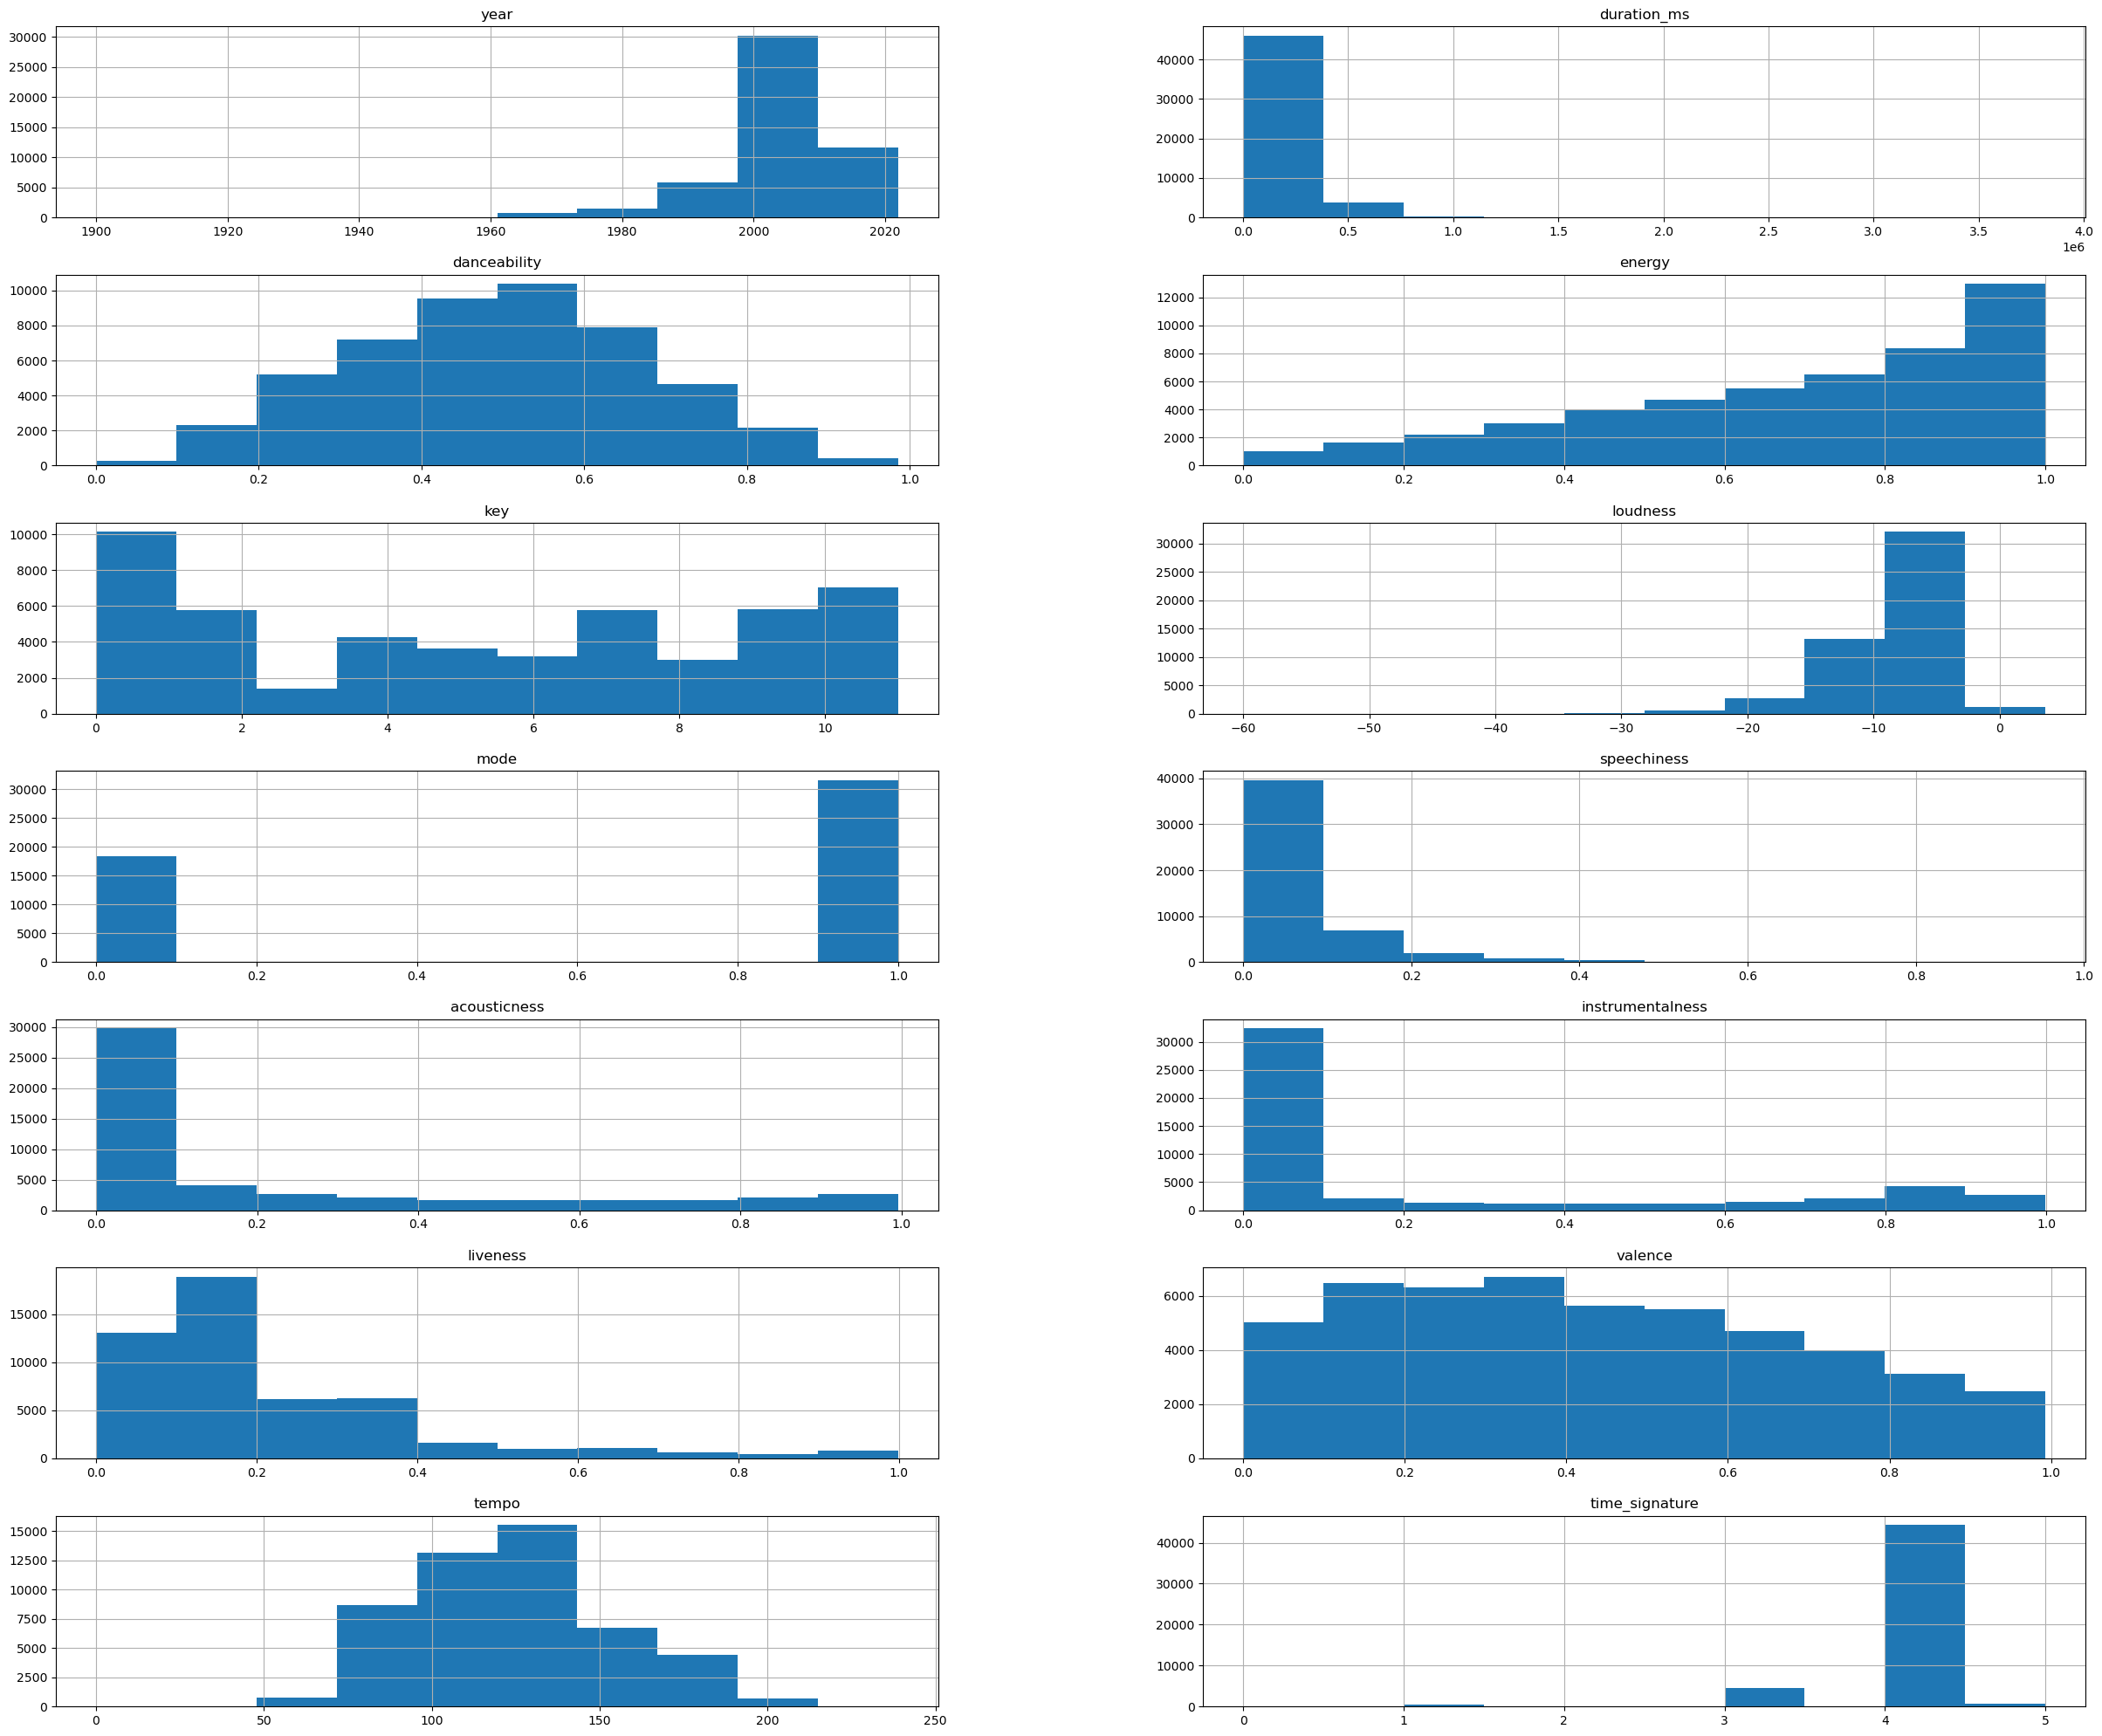

In [39]:
music_data_clean.hist(layout=(7,2),figsize=(30,25));

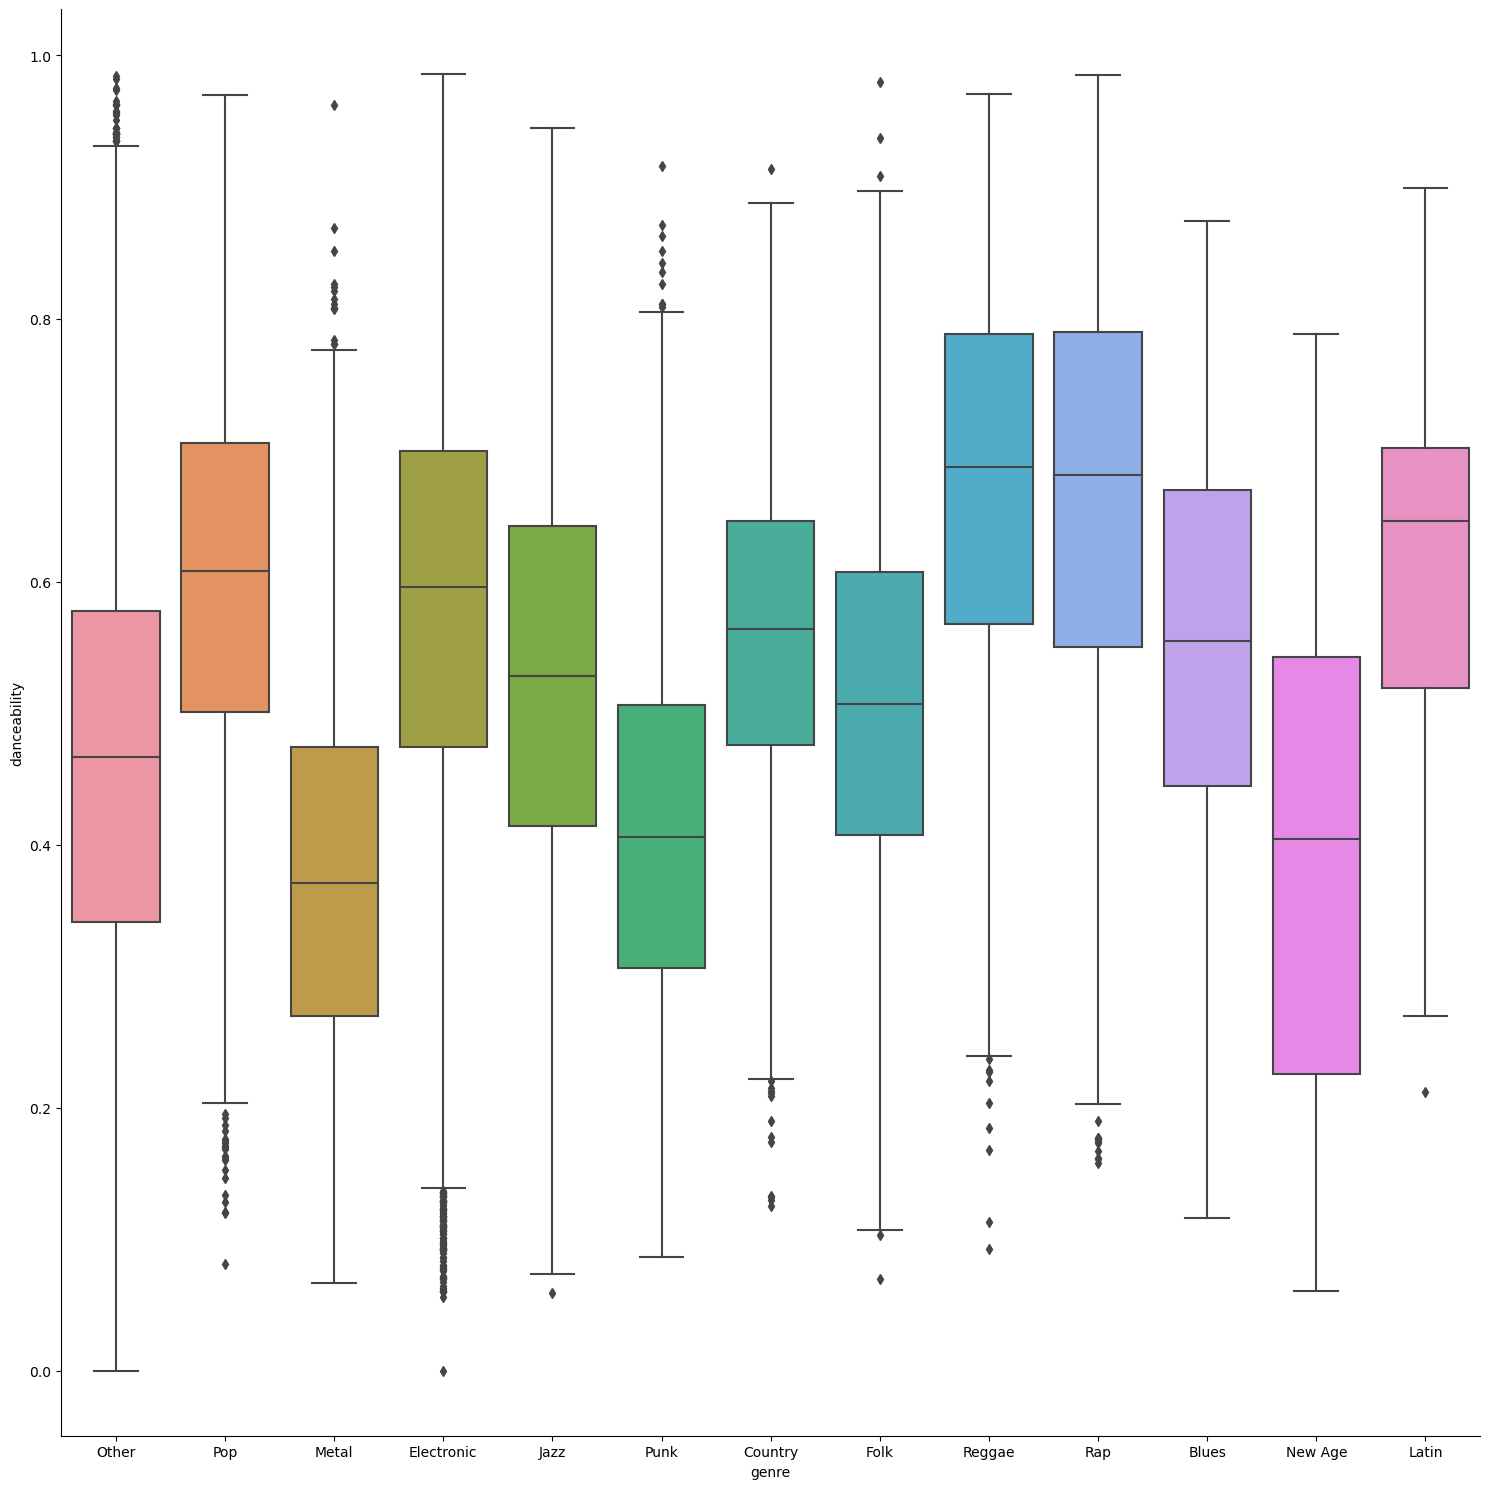

In [24]:
sb.catplot(data=music_data_clean,x='genre',y= 'danceability',kind='box',height=15)

In [26]:
corrilation_data = music_data_clean.corr()
corrilation_data

/var/folders/bb/6mlfzyx15rn0wn_zc8jyp7v80000gn/T/ipykernel_1879/3104536793.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrilation_data = music_data_clean.corr()


,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
year,1.000000,-0.018683,0.050250,0.068525,-0.000619,0.213940,-0.052587,0.026862,-0.019711,-0.011637,-0.000285,-0.055800,0.013490,0.007281
duration_ms,-0.018683,1.000000,-0.072538,-0.014546,0.010767,-0.052003,-0.067298,-0.079989,-0.085391,0.180378,0.018754,-0.208687,-0.001529,-0.001199
danceability,0.050250,-0.072538,1.000000,-0.064044,0.013734,0.028972,-0.020524,0.026520,-0.001863,-0.155455,-0.134529,0.542431,-0.109995,0.153045
energy,0.068525,-0.014546,-0.064044,1.000000,0.023415,0.778478,-0.016001,0.219815,-0.730301,-0.111941,0.191929,0.189113,0.229543,0.136966
key,-0.000619,0.010767,0.013734,0.023415,1.000000,0.010315,-0.164054,0.029301,-0.019870,0.015912,-0.001450,0.019993,0.011911,0.010856
loudness,0.213940,-0.052003,0.028972,0.778478,0.010315,1.000000,0.000961,0.131694,-0.608924,-0.296450,0.101820,0.181240,0.179204,0.116866
mode,-0.052587,-0.067298,-0.020524,-0.016001,-0.164054,0.000961,1.000000,-0.024012,0.022957,-0.060819,-0.003971,0.035923,0.007603,0.003110
speechiness,0.026862,-0.079989,0.026520,0.219815,0.029301,0.131694,-0.024012,1.000000,-0.123353,-0.063436,0.142189,0.003072,0.073406,0.019624
acousticness,-0.019711,-0.085391,-0.001863,-0.730301,-0.019870,-0.608924,0.022957,-0.123353,1.000000,0.088752,-0.101912,-0.122686,-0.186790,-0.134442
instrumentalness,-0.011637,0.180378,-0.155455,-0.111941,0.015912,-0.296450,-0.060819,-0.063436,0.088752,1.000000,-0.034598,-0.266712,-0.027601,-0.053414


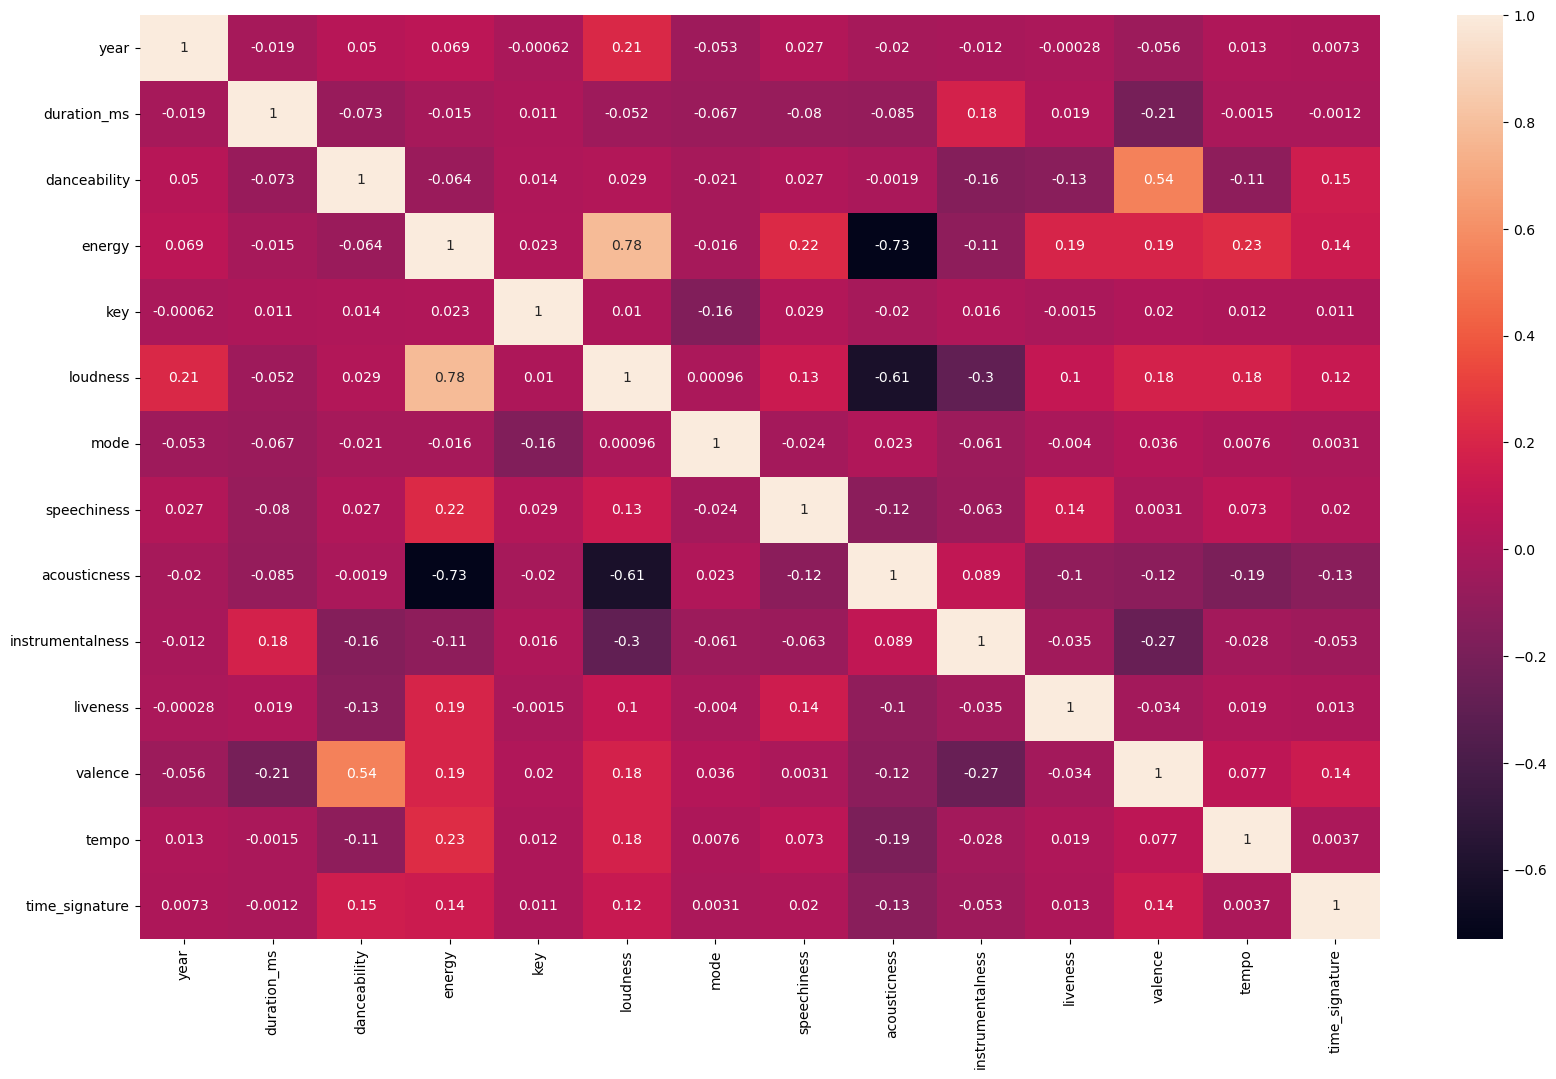

In [28]:
plt.figure (figsize=(20, 12))
sb.heatmap(corrilation_data,annot=True);

   Из корреляционной таблице можно сделать вывод, о том, что **valence** ("позитивность") имеет высокую зависимость </br>
от **danceability** ("танцевальность") композиции - 0.54 </br>
А также, **energy** (энергичность) от **loudness** (громкость) - 0.78

   Акустические композиции наименее энергичные и имеют низкую громкость. Это следует из корреляции -0.73 и -0.61, соответсвтенно

Посмотрим распределение энергичности композиции, в зависимости от жанра

<Axes: xlabel='energy', ylabel='loudness'>

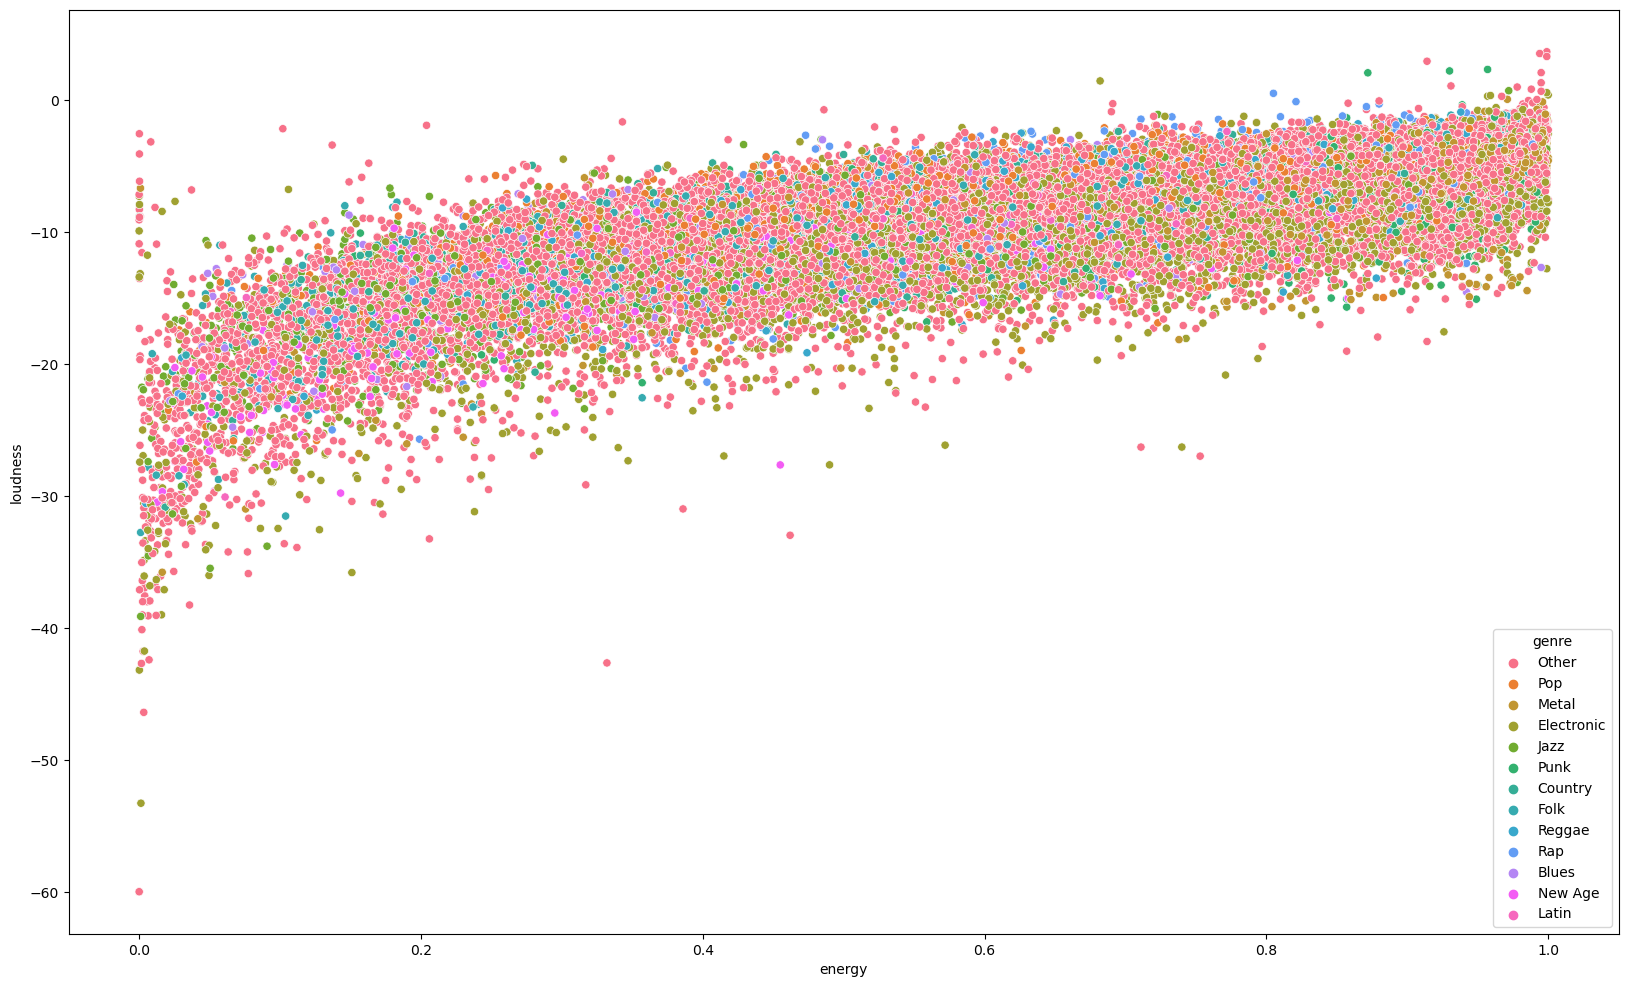

In [34]:
plt.figure (figsize=(20, 12))

sb.scatterplot(x='energy', y='loudness', hue='genre', data=music_data_clean)

<Axes: xlabel='loudness', ylabel='acousticness'>

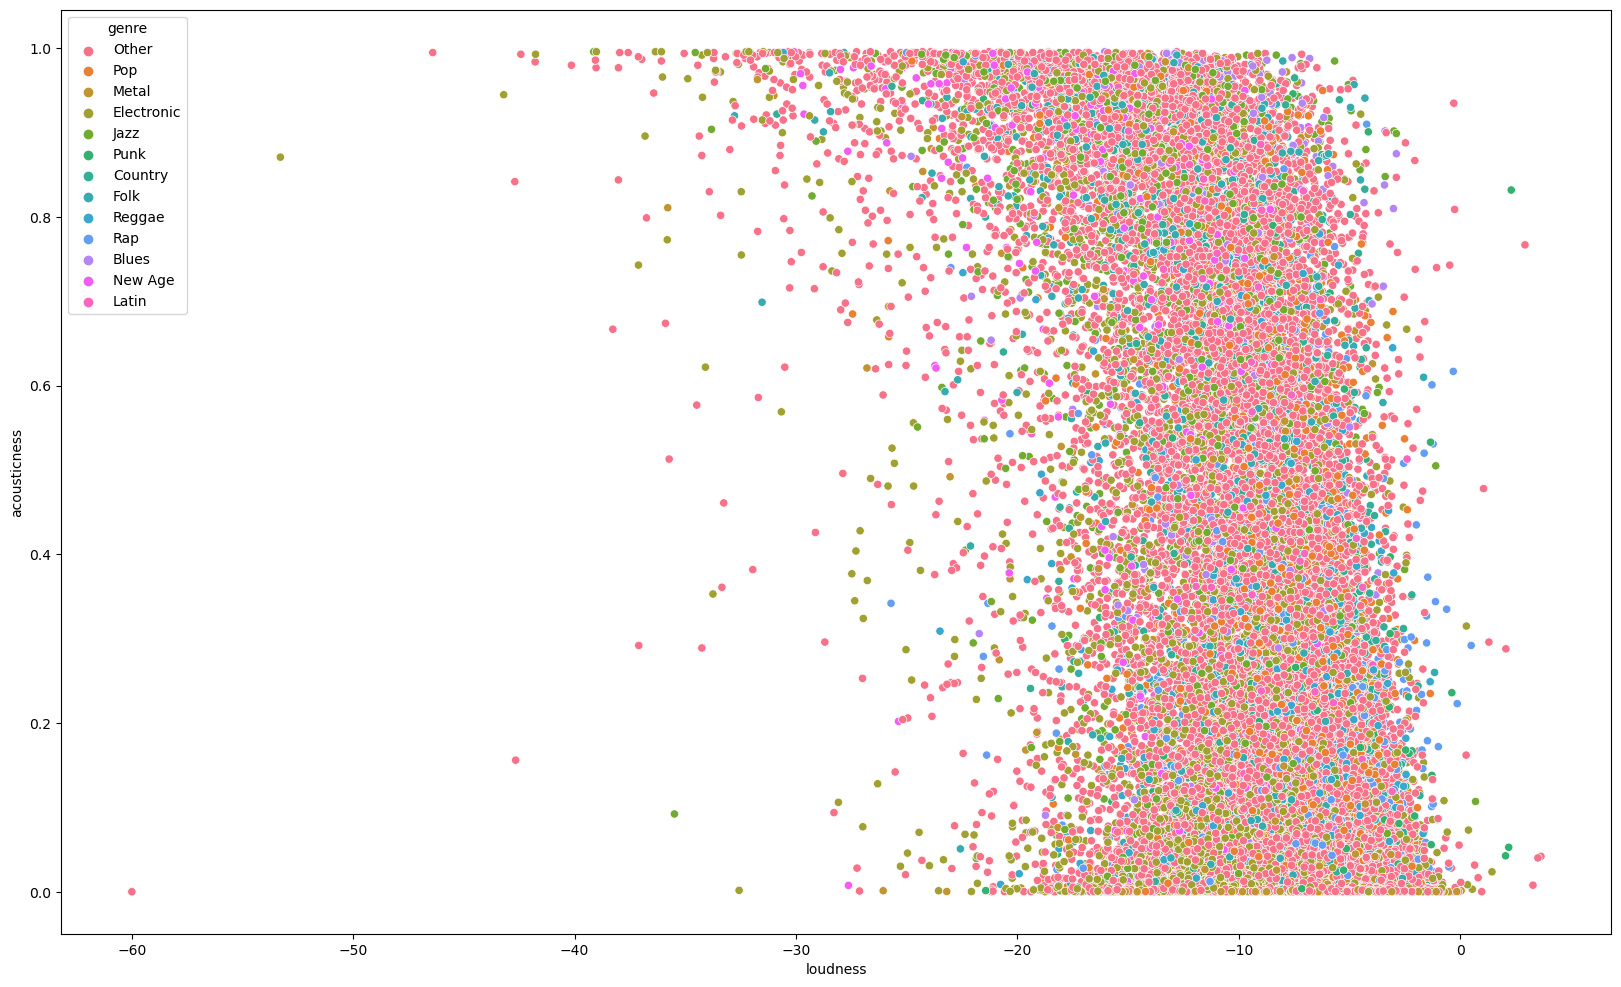

In [39]:
plt.figure (figsize=(20, 12))
sb.scatterplot(x='loudness', y='acousticness', hue='genre', data=music_data_clean)